In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from functools import partial
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Plot training and validation metrics
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_27 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_22 (Conv2D)          (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_28 (Ba  (None, 48, 48, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                      

2023-10-21 18:25:16.961573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-10-21 18:25:17.064737: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


225/225 [==============================] - 33s 141ms/step - loss: 1.8159 - categorical_accuracy: 0.2920 - val_loss: 2.1410 - val_categorical_accuracy: 0.2549 - lr: 0.0010
Epoch 2/50
225/225 [==============================] - 31s 140ms/step - loss: 1.6445 - categorical_accuracy: 0.3533 - val_loss: 1.8731 - val_categorical_accuracy: 0.2438 - lr: 0.0010
Epoch 3/50
225/225 [==============================] - 31s 140ms/step - loss: 1.5145 - categorical_accuracy: 0.4117 - val_loss: 1.7059 - val_categorical_accuracy: 0.3750 - lr: 0.0010
Epoch 4/50
225/225 [==============================] - 32s 140ms/step - loss: 1.4222 - categorical_accuracy: 0.4479 - val_loss: 1.6412 - val_categorical_accuracy: 0.3926 - lr: 0.0010
Epoch 5/50
225/225 [==============================] - 32s 140ms/step - loss: 1.3590 - categorical_accuracy: 0.4841 - val_loss: 1.4146 - val_categorical_accuracy: 0.4751 - lr: 0.0010
Epoch 6/50
225/225 [==============================] - 31s 140ms/step - loss: 1.2952 - categorical_acc

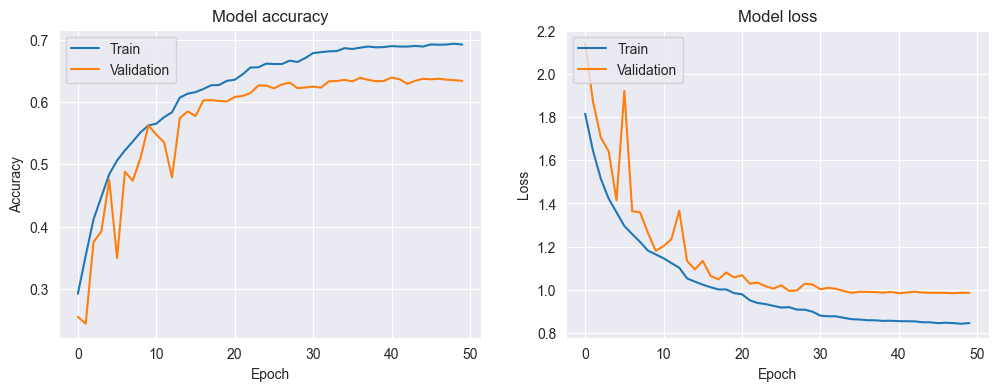

29/29 [==============================] - 1s 36ms/step - loss: 0.9423 - categorical_accuracy: 0.6520
Test Accuracy: 65.20%
29/29 [==============================] - 1s 32ms/step


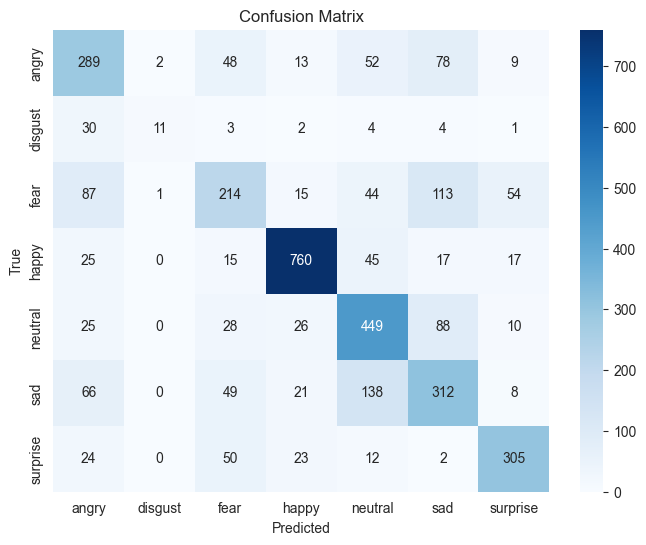

              precision    recall  f1-score   support

       angry       0.53      0.59      0.56       491
     disgust       0.79      0.20      0.32        55
        fear       0.53      0.41      0.46       528
       happy       0.88      0.86      0.87       879
     neutral       0.60      0.72      0.66       626
         sad       0.51      0.53      0.52       594
    surprise       0.75      0.73      0.74       416

    accuracy                           0.65      3589
   macro avg       0.66      0.58      0.59      3589
weighted avg       0.66      0.65      0.65      3589


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_dir = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/train'
val_dir = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data/test'
test_dir = '/Users/shreyas/Desktop/5th_sem/DeepLearning_Lab/Project/training_experimental/data_test/test'

input_shape = (48, 48, 1)
num_classes = 7

datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

model = keras.Sequential()

# Block 1
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))  # Increase the number of units
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))  # Increase the number of units
model.add(layers.BatchNormalization())

# Output layer
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

model.summary()

batch_size = 128
epochs = 50

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle= False
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10, 
    restore_best_weights=True
)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler]
)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig("VGG16.pdf")
plt.show()

model.save("vgg16.keras")

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

true_labels = test_generator.classes
predictions = model.predict(test_generator)

predicted_labels = np.argmax(predictions, axis=1)

confusion_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix_VGG16.pdf")
plt.show()

class_names = list(test_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)